In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

In [2]:
# get grid corners (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


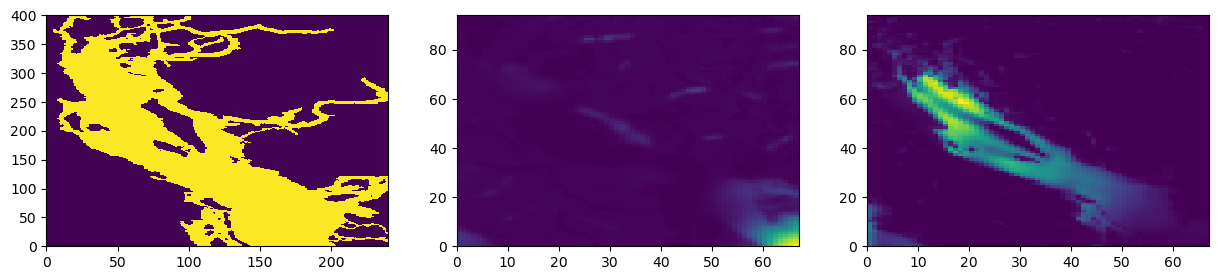

In [3]:
fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,400:800,110:350])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,119:213,96:163]**2+\
                      g.variables['v_wind'][0,119:213,96:163]**2)**(3/2))
    print(g.variables['u_wind'])

In [4]:
ll_lon=navlon[400,110]
lr_lon=navlon[400,350]
ul_lon=navlon[800,110]
ur_lon=navlon[800,350]
ll_lat=navlat[400,110]
lr_lat=navlat[400,350]
ul_lat=navlat[800,110]
ur_lat=navlat[800,350]

In [5]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(119, 121) (134, 163) (200, 96) (213, 136)


In [6]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(114, 121) (132, 161) (189, 96) (202, 134)


In [7]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(117, 124) (131, 163) (193, 99) (205, 137)


In [8]:
# ops: use j: 119:213, i: 96:163
# gl1: use j: 114:202, i: 96:161
# gl2: use j: 117:205, i: 99:163

In [9]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(119,213)
        ilims=(96,163)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(114,202)
        ilims=(96,161)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(117,205)
        ilims=(99,163)
    return opsdir, nam_fmt, jlims,ilims

/tmp/ipykernel_126402/1813546929.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')


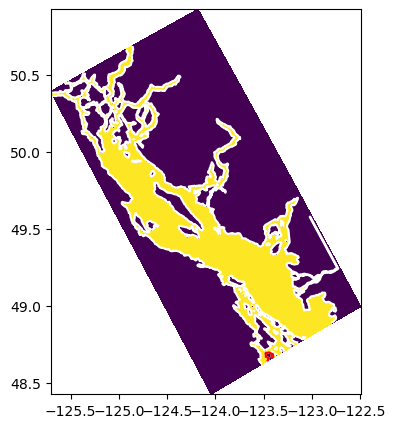

In [10]:
fig,ax=plt.subplots(1,1,figsize=(4,5))

ax.pcolormesh(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],shading='auto')
cl=ax.contour(navlon[350:850,100:398],navlat[350:850,100:398],tmask[0,350:850,100:398],[.5],colors='w')

plt.plot(cl.allsegs[0][0][:,0],cl.allsegs[0][0][:,1],'r-')

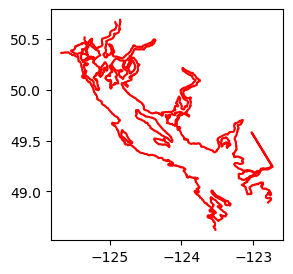

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,3))
lens=list()
modlines=list()
for ii in range(0,len(cl.allsegs[0])):
    lens.append(len(cl.allsegs[0][ii][:,1]))
    #if np.min(cl.allsegs[0][ii][:,1])<49.2 and np.max(cl.allsegs[0][ii][:,1])>50:
    if len(cl.allsegs[0][ii][:,1])>100:
        #print(ii)
        ax.plot(cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1],'r-')
        modlines.append((cl.allsegs[0][ii][:,0],cl.allsegs[0][ii][:,1]))

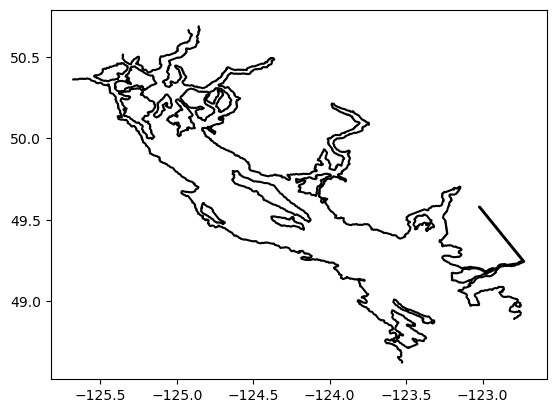

In [12]:
for (lons,lats) in modlines:
    plt.plot(lons,lats,'k-')

In [13]:
opslines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,ops_lon-360,ops_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    opslines.append((x[:,0],x[:,1]))

In [14]:
gl1lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl1_lon-360,gl1_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl1lines.append((x[:,0],x[:,1]))

In [15]:
gl2lines=list()
for (lons,lats) in modlines:
    x=np.array([geo_tools.find_closest_model_point(lon,lat,gl2_lon-360,gl2_lat,grid='GEM2.5') \
                for lat, lon in zip(lats,lons)])
    gl2lines.append((x[:,0],x[:,1]))

In [16]:
# Wind processing parameters
rho_a = 1.225     # kg/m3
theta = np.deg2rad(55.5) #rotation = 55.5

# Cd coefficients from Hellerman and Rosenstein (1983) JPO (neglect T)
coeff = [0.934e-3, 0.788e-4, -0.616e-6]

## January

In [17]:
# extract march mean wind from one of each type of file:

## gl1, 2007
#year=2007
#day=dt.datetime(year,1,1)
#opsdir, namfmt, jlims, ilims = getWindVars(day)
#flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
#                           flen=1,ftype='None',tres=24);
#fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
#fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
#gl12007=(fu**2+fv**2)**(3/2)
#margl12007mean=np.mean(gl12007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2008=np.sqrt(fu**2 + fv**2)
jan_C_d2008 = coeff[0] + coeff[1] * jan_wspd2008 + coeff[2] * jan_wspd2008**2
jan_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2008 = rho_a * jan_C_d2008 * jan_v_along2008 * jan_wspd2008
jan_tau2008mean=np.mean(jan_tau_along2008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2009=np.sqrt(fu**2 + fv**2)
jan_C_d2009 = coeff[0] + coeff[1] * jan_wspd2009 + coeff[2] * jan_wspd2009**2
jan_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2009 = rho_a * jan_C_d2009 * jan_v_along2009 * jan_wspd2009
jan_tau2009mean=np.mean(jan_tau_along2009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2010=np.sqrt(fu**2 + fv**2)
jan_C_d2010 = coeff[0] + coeff[1] * jan_wspd2010 + coeff[2] * jan_wspd2010**2
jan_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2010 = rho_a * jan_C_d2010 * jan_v_along2010 * jan_wspd2010
jan_tau2010mean=np.mean(jan_tau_along2010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2011=np.sqrt(fu**2 + fv**2)
jan_C_d2011 = coeff[0] + coeff[1] * jan_wspd2011 + coeff[2] * jan_wspd2011**2
jan_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2011 = rho_a * jan_C_d2011 * jan_v_along2011 * jan_wspd2011
jan_tau2011mean=np.mean(jan_tau_along2011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2012=np.sqrt(fu**2 + fv**2)
jan_C_d2012 = coeff[0] + coeff[1] * jan_wspd2012 + coeff[2] * jan_wspd2012**2
jan_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2012 = rho_a * jan_C_d2012 * jan_v_along2012 * jan_wspd2012
jan_tau2012mean=np.mean(jan_tau_along2012,0)

## gl1, 2007
year=2013
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2013=np.sqrt(fu**2 + fv**2)
jan_C_d2013 = coeff[0] + coeff[1] * jan_wspd2013 + coeff[2] * jan_wspd2013**2
jan_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2013 = rho_a * jan_C_d2013 * jan_v_along2013 * jan_wspd2013
jan_tau2013mean=np.mean(jan_tau_along2013,0)

## gl1, 2007
year=2014
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2014=np.sqrt(fu**2 + fv**2)
jan_C_d2014 = coeff[0] + coeff[1] * jan_wspd2014 + coeff[2] * jan_wspd2014**2
jan_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2014 = rho_a * jan_C_d2014 * jan_v_along2014 * jan_wspd2014
jan_tau2014mean=np.mean(jan_tau_along2014,0)

## gl1, 2007
year=2015
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2015=np.sqrt(fu**2 + fv**2)
jan_C_d2015 = coeff[0] + coeff[1] * jan_wspd2015 + coeff[2] * jan_wspd2015**2
jan_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2015 = rho_a * jan_C_d2015 * jan_v_along2015 * jan_wspd2015
jan_tau2015mean=np.mean(jan_tau_along2015,0)

## ops, 2015
year=2016
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2016=np.sqrt(fu**2 + fv**2)
jan_C_d2016 = coeff[0] + coeff[1] * jan_wspd2016 + coeff[2] * jan_wspd2016**2
jan_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2016 = rho_a * jan_C_d2016 * jan_v_along2016 * jan_wspd2016
jan_tau2016mean=np.mean(jan_tau_along2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2017=np.sqrt(fu**2 + fv**2)
jan_C_d2017 = coeff[0] + coeff[1] * jan_wspd2017 + coeff[2] * jan_wspd2017**2
jan_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2017 = rho_a * jan_C_d2017 * jan_v_along2017 * jan_wspd2017
jan_tau2017mean=np.mean(jan_tau_along2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2018=np.sqrt(fu**2 + fv**2)
jan_C_d2018 = coeff[0] + coeff[1] * jan_wspd2018 + coeff[2] * jan_wspd2018**2
jan_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2018 = rho_a * jan_C_d2018 * jan_v_along2018 * jan_wspd2018
jan_tau2018mean=np.mean(jan_tau_along2018,0)

## gl1, 2007
year=2019
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2019=np.sqrt(fu**2 + fv**2)
jan_C_d2019 = coeff[0] + coeff[1] * jan_wspd2019 + coeff[2] * jan_wspd2019**2
jan_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2019 = rho_a * jan_C_d2019 * jan_v_along2019 * jan_wspd2019
jan_tau2019mean=np.mean(jan_tau_along2019,0)

## gl1, 2007
year=2020
day=dt.datetime(year,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,1,1),dt.datetime(year,1,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_wspd2020=np.sqrt(fu**2 + fv**2)
jan_C_d2020 = coeff[0] + coeff[1] * jan_wspd2020 + coeff[2] * jan_wspd2020**2
jan_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
jan_tau_along2020 = rho_a * jan_C_d2020 * jan_v_along2020 * jan_wspd2020
jan_tau2020mean=np.mean(jan_tau_along2020,0)

Text(0.5, 0.98, 'January Mean Wind Stress')

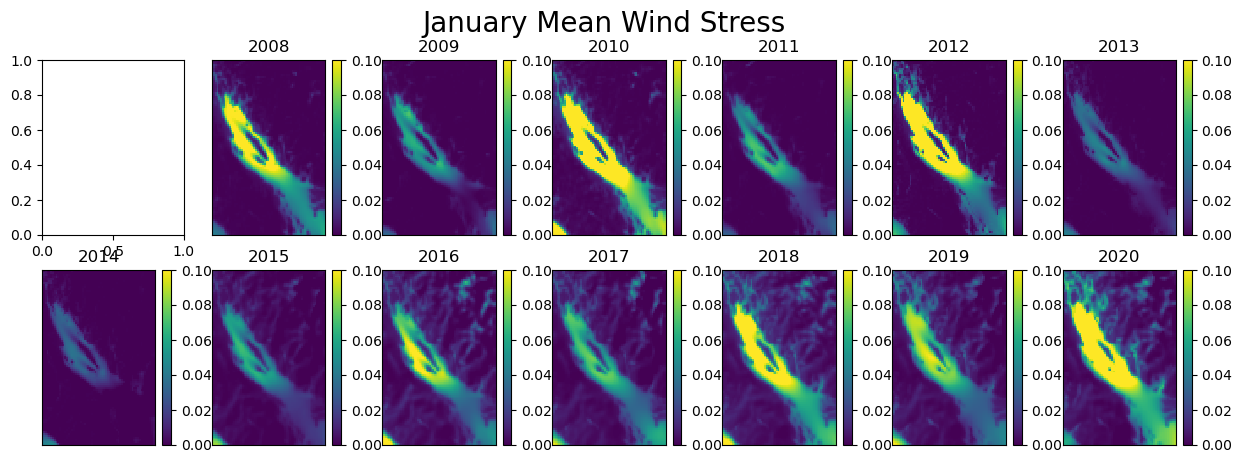

In [18]:
### January winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.1



#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jan_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jan_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jan_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jan_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jan_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jan_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jan_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jan_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jan_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jan_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jan_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jan_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jan_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)

fig.suptitle('January Mean Wind Stress',fontsize=20)

In [19]:
#Jan2007=np.nanmean(jan_gl12007mean)
Jan2008=np.nanmean(jan_tau2008mean)
Jan2009=np.nanmean(jan_tau2009mean)
Jan2010=np.nanmean(jan_tau2010mean)
Jan2011=np.nanmean(jan_tau2011mean)
Jan2012=np.nanmean(jan_tau2012mean)
Jan2013=np.nanmean(jan_tau2013mean)
Jan2014=np.nanmean(jan_tau2014mean)
Jan2015=np.nanmean(jan_tau2015mean)
Jan2016=np.nanmean(jan_tau2016mean)
Jan2017=np.nanmean(jan_tau2017mean)
Jan2018=np.nanmean(jan_tau2018mean)
Jan2019=np.nanmean(jan_tau2019mean)
Jan2020=np.nanmean(jan_tau2020mean)

## February

In [20]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2007=np.sqrt(fu**2 + fv**2)
feb_C_d2007 = coeff[0] + coeff[1] * feb_wspd2007 + coeff[2] * feb_wspd2007**2
feb_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2007 = rho_a * feb_C_d2007 * feb_v_along2007 * feb_wspd2007
feb_tau2007mean=np.mean(feb_tau_along2007,0)


year=2008
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2008=np.sqrt(fu**2 + fv**2)
feb_C_d2008 = coeff[0] + coeff[1] * feb_wspd2008 + coeff[2] * feb_wspd2008**2
feb_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2008 = rho_a * feb_C_d2008 * feb_v_along2008 * feb_wspd2008
feb_tau2008mean=np.mean(feb_tau_along2008,0)


year=2009
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2009=np.sqrt(fu**2 + fv**2)
feb_C_d2009 = coeff[0] + coeff[1] * feb_wspd2009 + coeff[2] * feb_wspd2009**2
feb_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2009 = rho_a * feb_C_d2009 * feb_v_along2009 * feb_wspd2009
feb_tau2009mean=np.mean(feb_tau_along2009,0)


year=2010
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2010=np.sqrt(fu**2 + fv**2)
feb_C_d2010 = coeff[0] + coeff[1] * feb_wspd2010 + coeff[2] * feb_wspd2010**2
feb_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2010 = rho_a * feb_C_d2010 * feb_v_along2010 * feb_wspd2010
feb_tau2010mean=np.mean(feb_tau_along2010,0)


year=2011
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2011=np.sqrt(fu**2 + fv**2)
feb_C_d2011 = coeff[0] + coeff[1] * feb_wspd2011 + coeff[2] * feb_wspd2011**2
feb_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2011 = rho_a * feb_C_d2011 * feb_v_along2011 * feb_wspd2011
feb_tau2011mean=np.mean(feb_tau_along2011,0)


year=2012
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2012=np.sqrt(fu**2 + fv**2)
feb_C_d2012 = coeff[0] + coeff[1] * feb_wspd2012 + coeff[2] * feb_wspd2012**2
feb_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2012 = rho_a * feb_C_d2012 * feb_v_along2012 * feb_wspd2012
feb_tau2012mean=np.mean(feb_tau_along2012,0)


year=2013
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2013=np.sqrt(fu**2 + fv**2)
feb_C_d2013 = coeff[0] + coeff[1] * feb_wspd2013 + coeff[2] * feb_wspd2013**2
feb_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2013 = rho_a * feb_C_d2013 * feb_v_along2013 * feb_wspd2013
feb_tau2013mean=np.mean(feb_tau_along2013,0)


year=2014
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2014=np.sqrt(fu**2 + fv**2)
feb_C_d2014 = coeff[0] + coeff[1] * feb_wspd2014 + coeff[2] * feb_wspd2014**2
feb_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2014 = rho_a * feb_C_d2014 * feb_v_along2014 * feb_wspd2014
feb_tau2014mean=np.mean(feb_tau_along2014,0)


year=2015
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2015=np.sqrt(fu**2 + fv**2)
feb_C_d2015 = coeff[0] + coeff[1] * feb_wspd2015 + coeff[2] * feb_wspd2015**2
feb_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2015 = rho_a * feb_C_d2015 * feb_v_along2015 * feb_wspd2015
feb_tau2015mean=np.mean(feb_tau_along2015,0)


year=2016
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2016=np.sqrt(fu**2 + fv**2)
feb_C_d2016 = coeff[0] + coeff[1] * feb_wspd2016 + coeff[2] * feb_wspd2016**2
feb_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2016 = rho_a * feb_C_d2016 * feb_v_along2016 * feb_wspd2016
feb_tau2016mean=np.mean(feb_tau_along2016,0)


year=2017
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2017=np.sqrt(fu**2 + fv**2)
feb_C_d2017 = coeff[0] + coeff[1] * feb_wspd2017 + coeff[2] * feb_wspd2017**2
feb_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2017 = rho_a * feb_C_d2017 * feb_v_along2017 * feb_wspd2017
feb_tau2017mean=np.mean(feb_tau_along2017,0)


year=2018
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2018=np.sqrt(fu**2 + fv**2)
feb_C_d2018 = coeff[0] + coeff[1] * feb_wspd2018 + coeff[2] * feb_wspd2018**2
feb_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2018 = rho_a * feb_C_d2018 * feb_v_along2018 * feb_wspd2018
feb_tau2018mean=np.mean(feb_tau_along2018,0)


year=2019
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,28),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2019=np.sqrt(fu**2 + fv**2)
feb_C_d2019 = coeff[0] + coeff[1] * feb_wspd2019 + coeff[2] * feb_wspd2019**2
feb_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2019 = rho_a * feb_C_d2019 * feb_v_along2019 * feb_wspd2019
feb_tau2019mean=np.mean(feb_tau_along2019,0)


year=2020
day=dt.datetime(year,2,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,2,1),dt.datetime(year,2,29),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
feb_wspd2020=np.sqrt(fu**2 + fv**2)
feb_C_d2020 = coeff[0] + coeff[1] * feb_wspd2020 + coeff[2] * feb_wspd2020**2
feb_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
feb_tau_along2020 = rho_a * feb_C_d2020 * feb_v_along2020 * feb_wspd2020
feb_tau2020mean=np.mean(feb_tau_along2020,0)

In [21]:
Feb2007=np.nanmean(feb_tau_along2007)
Feb2008=np.nanmean(feb_tau_along2008)
Feb2009=np.nanmean(feb_tau_along2009)
Feb2010=np.nanmean(feb_tau_along2010)
Feb2011=np.nanmean(feb_tau_along2011)
Feb2012=np.nanmean(feb_tau_along2012)
Feb2013=np.nanmean(feb_tau_along2013)
Feb2014=np.nanmean(feb_tau_along2014)
Feb2015=np.nanmean(feb_tau_along2015)
Feb2016=np.nanmean(feb_tau_along2016)
Feb2017=np.nanmean(feb_tau_along2017)
Feb2018=np.nanmean(feb_tau_along2018)
Feb2019=np.nanmean(feb_tau_along2019)
Feb2020=np.nanmean(feb_tau_along2020)

In [22]:
print(Feb2007, Feb2008,Feb2009,Feb2010,Feb2011,Feb2012,Feb2013,Feb2014,Feb2015,Feb2016,Feb2017,Feb2018,Feb2019,Feb2020)

0.013810883 0.003972533 0.0028232888 0.014904167 0.0041334555 0.007366499 0.009655581 0.010094113 0.0059123556 0.014510952 0.0077356114 -0.0025118508 0.00308069 5.871237e-05


Text(0.5, 0.98, 'February Mean Wind Stress')

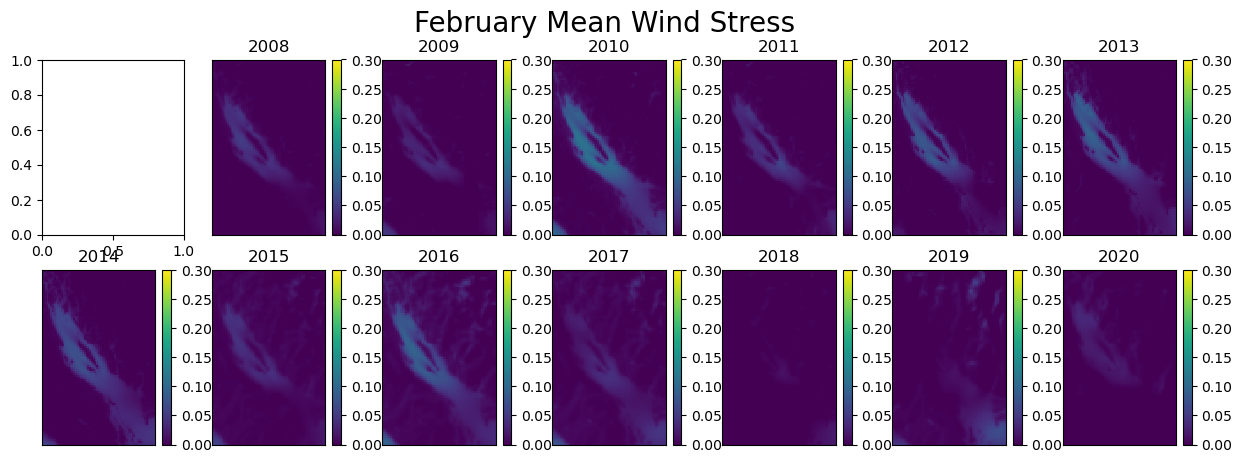

In [23]:
### February winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.3



#iax=ax[0,0]
#iax.set_title('2007')
#m=iax.pcolormesh(margl12007mean)
#fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(feb_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(feb_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(feb_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(feb_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(feb_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(feb_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(feb_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(feb_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(feb_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(feb_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(feb_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(feb_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(feb_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)

fig.suptitle('February Mean Wind Stress',fontsize=20)

## March

In [24]:
# extract march mean wind from one of each type of file:

## gl1, 2007
year=2007
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2007=np.sqrt(fu**2 + fv**2)
mar_C_d2007 = coeff[0] + coeff[1] * mar_wspd2007 + coeff[2] * mar_wspd2007**2
mar_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2007 = rho_a * mar_C_d2007 * mar_v_along2007 * mar_wspd2007
mar_tau2007mean=np.mean(mar_tau_along2007,0)

## gl1, 2008
year=2008
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2008=np.sqrt(fu**2 + fv**2)
mar_C_d2008 = coeff[0] + coeff[1] * mar_wspd2008 + coeff[2] * mar_wspd2008**2
mar_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2008 = rho_a * mar_C_d2008 * mar_v_along2008 * mar_wspd2008
mar_tau2008mean=np.mean(mar_tau_along2008,0)

## gl1, 2007
year=2009
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2009=np.sqrt(fu**2 + fv**2)
mar_C_d2009 = coeff[0] + coeff[1] * mar_wspd2009 + coeff[2] * mar_wspd2009**2
mar_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2009 = rho_a * mar_C_d2009 * mar_v_along2009 * mar_wspd2009
mar_tau2009mean=np.mean(mar_tau_along2009,0)

## gl1, 2007
year=2010
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2010=np.sqrt(fu**2 + fv**2)
mar_C_d2010 = coeff[0] + coeff[1] * mar_wspd2010 + coeff[2] * mar_wspd2010**2
mar_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2010 = rho_a * mar_C_d2010 * mar_v_along2010 * mar_wspd2010
mar_tau2010mean=np.mean(mar_tau_along2010,0)

## gl1, 2007
year=2011
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2011=np.sqrt(fu**2 + fv**2)
mar_C_d2011 = coeff[0] + coeff[1] * mar_wspd2011 + coeff[2] * mar_wspd2011**2
mar_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2011 = rho_a * mar_C_d2011 * mar_v_along2011 * mar_wspd2011
mar_tau2011mean=np.mean(mar_tau_along2011,0)

## gl1, 2007
year=2012
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2012=np.sqrt(fu**2 + fv**2)
mar_C_d2012 = coeff[0] + coeff[1] * mar_wspd2012 + coeff[2] * mar_wspd2012**2
mar_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2012 = rho_a * mar_C_d2012 * mar_v_along2012 * mar_wspd2012
mar_tau2012mean=np.mean(mar_tau_along2012,0)


## gl1, 2007
year=2013
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2013=np.sqrt(fu**2 + fv**2)
mar_C_d2013 = coeff[0] + coeff[1] * mar_wspd2013 + coeff[2] * mar_wspd2013**2
mar_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2013 = rho_a * mar_C_d2013 * mar_v_along2013 * mar_wspd2013
mar_tau2013mean=np.mean(mar_tau_along2013,0)


## gl1, 2007
year=2014
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2014=np.sqrt(fu**2 + fv**2)
mar_C_d2014 = coeff[0] + coeff[1] * mar_wspd2014 + coeff[2] * mar_wspd2014**2
mar_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2014 = rho_a * mar_C_d2014 * mar_v_along2014 * mar_wspd2014
mar_tau2014mean=np.mean(mar_tau_along2014,0)


## gl1, 2007
year=2015
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2015=np.sqrt(fu**2 + fv**2)
mar_C_d2015 = coeff[0] + coeff[1] * mar_wspd2015 + coeff[2] * mar_wspd2015**2
mar_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2015 = rho_a * mar_C_d2015 * mar_v_along2015 * mar_wspd2015
mar_tau2015mean=np.mean(mar_tau_along2015,0)


## ops, 2015
year=2016
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2016=np.sqrt(fu**2 + fv**2)
mar_C_d2016 = coeff[0] + coeff[1] * mar_wspd2016 + coeff[2] * mar_wspd2016**2
mar_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2016 = rho_a * mar_C_d2016 * mar_v_along2016 * mar_wspd2016
mar_tau2016mean=np.mean(mar_tau_along2016,0)

## gl1, 2007
year=2017
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2017=np.sqrt(fu**2 + fv**2)
mar_C_d2017 = coeff[0] + coeff[1] * mar_wspd2017 + coeff[2] * mar_wspd2017**2
mar_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2017 = rho_a * mar_C_d2017 * mar_v_along2017 * mar_wspd2017
mar_tau2017mean=np.mean(mar_tau_along2017,0)

## gl1, 2007
year=2018
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2018=np.sqrt(fu**2 + fv**2)
mar_C_d2018 = coeff[0] + coeff[1] * mar_wspd2018 + coeff[2] * mar_wspd2018**2
mar_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2018 = rho_a * mar_C_d2018 * mar_v_along2018 * mar_wspd2018
mar_tau2018mean=np.mean(mar_tau_along2018,0)


## gl1, 2007
year=2019
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2019=np.sqrt(fu**2 + fv**2)
mar_C_d2019 = coeff[0] + coeff[1] * mar_wspd2019 + coeff[2] * mar_wspd2019**2
mar_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2019 = rho_a * mar_C_d2019 * mar_v_along2019 * mar_wspd2019
mar_tau2019mean=np.mean(mar_tau_along2019,0)


## gl1, 2007
year=2020
day=dt.datetime(year,3,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,3,1),dt.datetime(year,3,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
mar_wspd2020=np.sqrt(fu**2 + fv**2)
mar_C_d2020= coeff[0] + coeff[1] * mar_wspd2020+ coeff[2] * mar_wspd2020*2
mar_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
mar_tau_along2020 = rho_a * mar_C_d2020 * mar_v_along2020 * mar_wspd2020
mar_tau2020mean=np.mean(mar_tau_along2020,0)


In [25]:
Mar2007=np.nanmean(mar_tau_along2007)
Mar2008=np.nanmean(mar_tau_along2008)
Mar2009=np.nanmean(mar_tau_along2009)
Mar2010=np.nanmean(mar_tau_along2010)
Mar2011=np.nanmean(mar_tau_along2011)
Mar2012=np.nanmean(mar_tau_along2012)
Mar2013=np.nanmean(mar_tau_along2013)
Mar2014=np.nanmean(mar_tau_along2014)
Mar2015=np.nanmean(mar_tau_along2015)
Mar2016=np.nanmean(mar_tau_along2016)
Mar2017=np.nanmean(mar_tau_along2017)
Mar2018=np.nanmean(mar_tau_along2018)
Mar2019=np.nanmean(mar_tau_along2019)
Mar2020=np.nanmean(mar_tau_along2020)

Text(0.5, 0.98, 'March Mean Wind Stress')

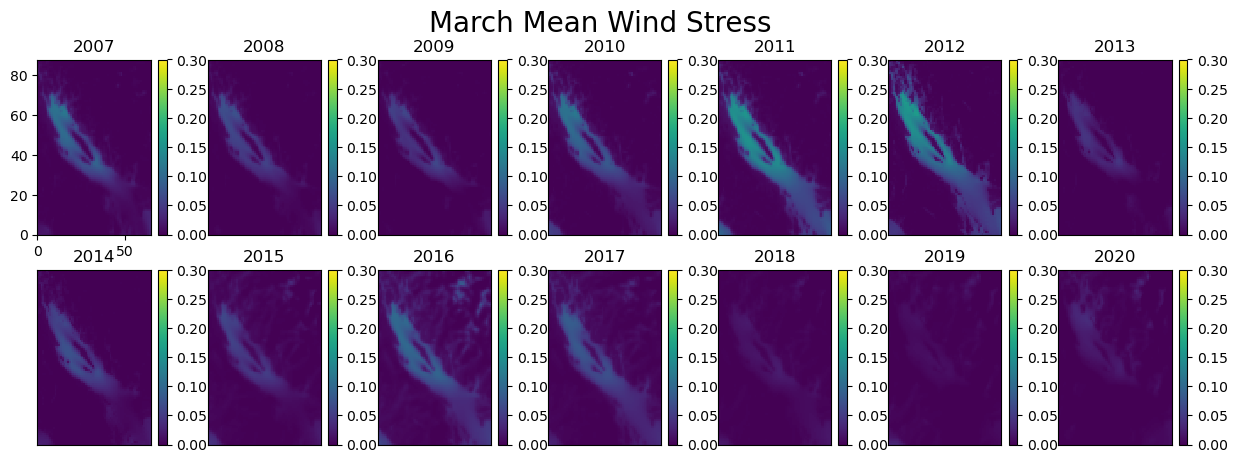

In [26]:
### March winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.3



iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(mar_tau2007mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(mar_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(mar_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(mar_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(mar_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(mar_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(mar_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(mar_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(mar_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(mar_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(mar_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(mar_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(mar_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(mar_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)

fig.suptitle('March Mean Wind Stress',fontsize=20)

## April

In [27]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2007=np.sqrt(fu**2 + fv**2)
apr_C_d2007 = coeff[0] + coeff[1] * apr_wspd2007 + coeff[2] * apr_wspd2007**2
apr_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2007 = rho_a * apr_C_d2007 * apr_v_along2007 * apr_wspd2007
apr_tau2007mean=np.mean(apr_tau_along2007,0)


year=2008
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2008=np.sqrt(fu**2 + fv**2)
apr_C_d2008 = coeff[0] + coeff[1] * apr_wspd2008 + coeff[2] * apr_wspd2008**2
apr_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2008 = rho_a * apr_C_d2008 * apr_v_along2008 * apr_wspd2008
apr_tau2008mean=np.mean(apr_tau_along2008,0)


year=2009
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2009=np.sqrt(fu**2 + fv**2)
apr_C_d2009 = coeff[0] + coeff[1] * apr_wspd2009 + coeff[2] * apr_wspd2009**2
apr_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2009 = rho_a * apr_C_d2009 * apr_v_along2009 * apr_wspd2009
apr_tau2009mean=np.mean(apr_tau_along2009,0)



year=2010
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2010=np.sqrt(fu**2 + fv**2)
apr_C_d2010 = coeff[0] + coeff[1] * apr_wspd2010 + coeff[2] * apr_wspd2010**2
apr_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2010 = rho_a * apr_C_d2010 * apr_v_along2010 * apr_wspd2010
apr_tau2010mean=np.mean(apr_tau_along2010,0)



year=2011
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2011=np.sqrt(fu**2 + fv**2)
apr_C_d2011 = coeff[0] + coeff[1] * apr_wspd2011 + coeff[2] * apr_wspd2011**2
apr_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2011 = rho_a * apr_C_d2011 * apr_v_along2011 * apr_wspd2011
apr_tau2011mean=np.mean(apr_tau_along2011,0)



year=2012
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2012=np.sqrt(fu**2 + fv**2)
apr_C_d2012 = coeff[0] + coeff[1] * apr_wspd2012 + coeff[2] * apr_wspd2012**2
apr_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2012 = rho_a * apr_C_d2012 * apr_v_along2012 * apr_wspd2012
apr_tau2012mean=np.mean(apr_tau_along2012,0)



year=2013
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2013=np.sqrt(fu**2 + fv**2)
apr_C_d2013 = coeff[0] + coeff[1] * apr_wspd2013 + coeff[2] * apr_wspd2013**2
apr_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2013 = rho_a * apr_C_d2013 * apr_v_along2013 * apr_wspd2013
apr_tau2013mean=np.mean(apr_tau_along2013,0)


year=2014
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2014=np.sqrt(fu**2 + fv**2)
apr_C_d2014 = coeff[0] + coeff[1] * apr_wspd2014 + coeff[2] * apr_wspd2014**2
apr_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2014 = rho_a * apr_C_d2014 * apr_v_along2014 * apr_wspd2014
apr_tau2014mean=np.mean(apr_tau_along2014,0)


year=2015
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2015=np.sqrt(fu**2 + fv**2)
apr_C_d2015 = coeff[0] + coeff[1] * apr_wspd2015 + coeff[2] * apr_wspd2015**2
apr_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2015 = rho_a * apr_C_d2015 * apr_v_along2015 * apr_wspd2015
apr_tau2015mean=np.mean(apr_tau_along2015,0)


year=2016
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2016=np.sqrt(fu**2 + fv**2)
apr_C_d2016 = coeff[0] + coeff[1] * apr_wspd2016 + coeff[2] * apr_wspd2016**2
apr_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2016 = rho_a * apr_C_d2016 * apr_v_along2016 * apr_wspd2016
apr_tau2016mean=np.mean(apr_tau_along2016,0)



year=2017
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2017=np.sqrt(fu**2 + fv**2)
apr_C_d2017 = coeff[0] + coeff[1] * apr_wspd2017 + coeff[2] * apr_wspd2017**2
apr_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2017 = rho_a * apr_C_d2017 * apr_v_along2017 * apr_wspd2017
apr_tau2017mean=np.mean(apr_tau_along2017,0)



year=2018
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2018=np.sqrt(fu**2 + fv**2)
apr_C_d2018 = coeff[0] + coeff[1] * apr_wspd2018 + coeff[2] * apr_wspd2018**2
apr_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2018 = rho_a * apr_C_d2018 * apr_v_along2018 * apr_wspd2018
apr_tau2018mean=np.mean(apr_tau_along2018,0)


year=2019
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2019=np.sqrt(fu**2 + fv**2)
apr_C_d2019 = coeff[0] + coeff[1] * apr_wspd2019 + coeff[2] * apr_wspd2019**2
apr_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2019 = rho_a * apr_C_d2019 * apr_v_along2019 * apr_wspd2019
apr_tau2019mean=np.mean(apr_tau_along2019,0)


year=2020
day=dt.datetime(year,4,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,4,1),dt.datetime(year,4,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
apr_wspd2020=np.sqrt(fu**2 + fv**2)
apr_C_d2020= coeff[0] + coeff[1] * apr_wspd2020+ coeff[2] * apr_wspd2020*2
apr_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
apr_tau_along2020 = rho_a * apr_C_d2020 * apr_v_along2020 * apr_wspd2020
apr_tau2020mean=np.mean(apr_tau_along2020,0)

Text(0.5, 0.98, 'April Mean Wind Speed')

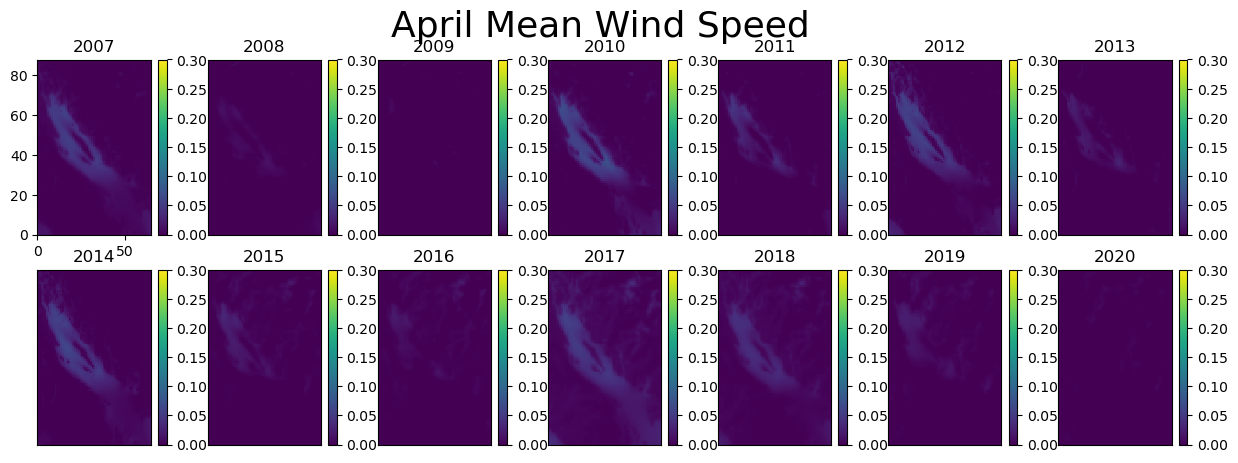

In [28]:
### April winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.3



iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(apr_tau2007mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(apr_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(apr_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(apr_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(apr_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(apr_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(apr_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(apr_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(apr_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(apr_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(apr_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(apr_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(apr_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(apr_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)


fig.suptitle('April Mean Wind Speed',fontsize=26)

In [29]:
Apr2007=np.nanmean(apr_tau2007mean)
Apr2008=np.nanmean(apr_tau2008mean)
Apr2009=np.nanmean(apr_tau2009mean)
Apr2010=np.nanmean(apr_tau2010mean)
Apr2011=np.nanmean(apr_tau2011mean)
Apr2012=np.nanmean(apr_tau2012mean)
Apr2013=np.nanmean(apr_tau2013mean)
Apr2014=np.nanmean(apr_tau2014mean)
Apr2015=np.nanmean(apr_tau2015mean)
Apr2016=np.nanmean(apr_tau2016mean)
Apr2017=np.nanmean(apr_tau2017mean)
Apr2018=np.nanmean(apr_tau2018mean)
Apr2019=np.nanmean(apr_tau2019mean)
Apr2020=np.nanmean(apr_tau2020mean)

## May

In [30]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2007=np.sqrt(fu**2 + fv**2)
may_C_d2007 = coeff[0] + coeff[1] * may_wspd2007 + coeff[2] * may_wspd2007**2
may_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2007 = rho_a * may_C_d2007 * may_v_along2007 * may_wspd2007
may_tau2007mean=np.mean(may_tau_along2007,0)


year=2008
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2008=np.sqrt(fu**2 + fv**2)
may_C_d2008 = coeff[0] + coeff[1] * may_wspd2008 + coeff[2] * may_wspd2008**2
may_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2008 = rho_a * may_C_d2008 * may_v_along2008 * may_wspd2008
may_tau2008mean=np.mean(may_tau_along2008,0)


year=2009
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2009=np.sqrt(fu**2 + fv**2)
may_C_d2009 = coeff[0] + coeff[1] * may_wspd2009 + coeff[2] * may_wspd2009**2
may_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2009 = rho_a * may_C_d2009 * may_v_along2009 * may_wspd2009
may_tau2009mean=np.mean(may_tau_along2009,0)



year=2010
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2010=np.sqrt(fu**2 + fv**2)
may_C_d2010 = coeff[0] + coeff[1] * may_wspd2010 + coeff[2] * may_wspd2010**2
may_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2010 = rho_a * may_C_d2010 * may_v_along2010 * may_wspd2010
may_tau2010mean=np.mean(may_tau_along2010,0)


year=2011
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2011=np.sqrt(fu**2 + fv**2)
may_C_d2011 = coeff[0] + coeff[1] * may_wspd2011 + coeff[2] * may_wspd2011**2
may_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2011 = rho_a * may_C_d2011 * may_v_along2011 * may_wspd2011
may_tau2011mean=np.mean(may_tau_along2011,0)


year=2012
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2012=np.sqrt(fu**2 + fv**2)
may_C_d2012 = coeff[0] + coeff[1] * may_wspd2012 + coeff[2] * may_wspd2012**2
may_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2012 = rho_a * may_C_d2012 * may_v_along2012 * may_wspd2012
may_tau2012mean=np.mean(may_tau_along2012,0)


year=2013
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2013=np.sqrt(fu**2 + fv**2)
may_C_d2013 = coeff[0] + coeff[1] * may_wspd2013 + coeff[2] * may_wspd2013**2
may_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2013 = rho_a * may_C_d2013 * may_v_along2013 * may_wspd2013
may_tau2013mean=np.mean(may_tau_along2013,0)



year=2014
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2014=np.sqrt(fu**2 + fv**2)
may_C_d2014 = coeff[0] + coeff[1] * may_wspd2014 + coeff[2] * may_wspd2014**2
may_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2014 = rho_a * may_C_d2014 * may_v_along2014 * may_wspd2014
may_tau2014mean=np.mean(may_tau_along2014,0)


year=2015
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2015=np.sqrt(fu**2 + fv**2)
may_C_d2015 = coeff[0] + coeff[1] * may_wspd2015 + coeff[2] * may_wspd2015**2
may_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2015 = rho_a * may_C_d2015 * may_v_along2015 * may_wspd2015
may_tau2015mean=np.mean(may_tau_along2015,0)


year=2016
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2016=np.sqrt(fu**2 + fv**2)
may_C_d2016 = coeff[0] + coeff[1] * may_wspd2016 + coeff[2] * may_wspd2016**2
may_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2016 = rho_a * may_C_d2016 * may_v_along2016 * may_wspd2016
may_tau2016mean=np.mean(may_tau_along2016,0)


year=2017
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2017=np.sqrt(fu**2 + fv**2)
may_C_d2017 = coeff[0] + coeff[1] * may_wspd2017 + coeff[2] * may_wspd2017**2
may_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2017 = rho_a * may_C_d2017 * may_v_along2017 * may_wspd2017
may_tau2017mean=np.mean(may_tau_along2017,0)


year=2018
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2018=np.sqrt(fu**2 + fv**2)
may_C_d2018 = coeff[0] + coeff[1] * may_wspd2018 + coeff[2] * may_wspd2018**2
may_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2018 = rho_a * may_C_d2018 * may_v_along2018 * may_wspd2018
may_tau2018mean=np.mean(may_tau_along2018,0)


year=2019
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2019=np.sqrt(fu**2 + fv**2)
may_C_d2019 = coeff[0] + coeff[1] * may_wspd2019 + coeff[2] * may_wspd2019**2
may_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2019 = rho_a * may_C_d2019 * may_v_along2019 * may_wspd2019
may_tau2019mean=np.mean(may_tau_along2019,0)



year=2020
day=dt.datetime(year,5,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,5,1),dt.datetime(year,5,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
may_wspd2020=np.sqrt(fu**2 + fv**2)
may_C_d2020= coeff[0] + coeff[1] * may_wspd2020+ coeff[2] * may_wspd2020*2
may_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
may_tau_along2020 = rho_a * may_C_d2020 * may_v_along2020 * may_wspd2020
may_tau2020mean=np.mean(may_tau_along2020,0)

In [31]:
np.shape(tmask)

(40, 898, 398)

Text(0.5, 0.98, 'May Mean Wind Speed')

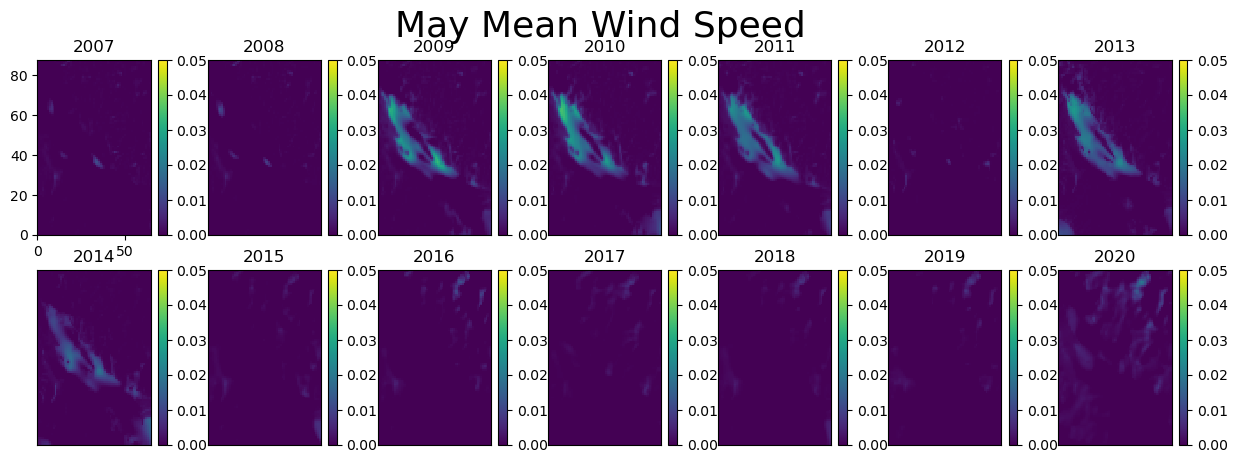

In [32]:
### May winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.05



iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(may_tau2007mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#   iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(may_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(may_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(may_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(may_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(may_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(may_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(may_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(may_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(may_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(may_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(may_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(may_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(may_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)


fig.suptitle('May Mean Wind Speed',fontsize=26)

In [33]:
May2007=np.nanmean(may_tau2007mean)
May2008=np.nanmean(may_tau2008mean)
May2009=np.nanmean(may_tau2009mean)
May2010=np.nanmean(may_tau2010mean)
May2011=np.nanmean(may_tau2011mean)
May2012=np.nanmean(may_tau2012mean)
May2013=np.nanmean(may_tau2013mean)
May2014=np.nanmean(may_tau2014mean)
May2015=np.nanmean(may_tau2015mean)
May2016=np.nanmean(may_tau2016mean)
May2017=np.nanmean(may_tau2017mean)
May2018=np.nanmean(may_tau2018mean)
May2019=np.nanmean(may_tau2019mean)
May2020=np.nanmean(may_tau2020mean)

## June

In [34]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2007=np.sqrt(fu**2 + fv**2)
jun_C_d2007 = coeff[0] + coeff[1] * jun_wspd2007 + coeff[2] * jun_wspd2007**2
jun_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2007 = rho_a * jun_C_d2007 * jun_v_along2007 * jun_wspd2007
jun_tau2007mean=np.mean(jun_tau_along2007,0)


year=2008
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2008=np.sqrt(fu**2 + fv**2)
jun_C_d2008 = coeff[0] + coeff[1] * jun_wspd2008 + coeff[2] * jun_wspd2008**2
jun_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2008 = rho_a * jun_C_d2008 * jun_v_along2008 * jun_wspd2008
jun_tau2008mean=np.mean(jun_tau_along2008,0)


year=2009
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2009=np.sqrt(fu**2 + fv**2)
jun_C_d2009 = coeff[0] + coeff[1] * jun_wspd2009 + coeff[2] * jun_wspd2009**2
jun_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2009 = rho_a * jun_C_d2009 * jun_v_along2009 * jun_wspd2009
jun_tau2009mean=np.mean(jun_tau_along2009,0)


year=2010
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2010=np.sqrt(fu**2 + fv**2)
jun_C_d2010 = coeff[0] + coeff[1] * jun_wspd2010 + coeff[2] * jun_wspd2010**2
jun_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2010 = rho_a * jun_C_d2010 * jun_v_along2010 * jun_wspd2010
jun_tau2010mean=np.mean(jun_tau_along2010,0)


year=2011
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2011=np.sqrt(fu**2 + fv**2)
jun_C_d2011 = coeff[0] + coeff[1] * jun_wspd2011 + coeff[2] * jun_wspd2011**2
jun_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2011 = rho_a * jun_C_d2011 * jun_v_along2011 * jun_wspd2011
jun_tau2011mean=np.mean(jun_tau_along2011,0)


year=2012
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2012=np.sqrt(fu**2 + fv**2)
jun_C_d2012 = coeff[0] + coeff[1] * jun_wspd2012 + coeff[2] * jun_wspd2012**2
jun_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2012 = rho_a * jun_C_d2012 * jun_v_along2012 * jun_wspd2012
jun_tau2012mean=np.mean(jun_tau_along2012,0)


year=2013
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2013=np.sqrt(fu**2 + fv**2)
jun_C_d2013 = coeff[0] + coeff[1] * jun_wspd2013 + coeff[2] * jun_wspd2013**2
jun_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2013 = rho_a * jun_C_d2013 * jun_v_along2013 * jun_wspd2013
jun_tau2013mean=np.mean(jun_tau_along2013,0)


year=2014
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2014=np.sqrt(fu**2 + fv**2)
jun_C_d2014 = coeff[0] + coeff[1] * jun_wspd2014 + coeff[2] * jun_wspd2014**2
jun_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2014 = rho_a * jun_C_d2014 * jun_v_along2014 * jun_wspd2014
jun_tau2014mean=np.mean(jun_tau_along2014,0)


year=2015
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2015=np.sqrt(fu**2 + fv**2)
jun_C_d2015 = coeff[0] + coeff[1] * jun_wspd2015 + coeff[2] * jun_wspd2015**2
jun_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2015 = rho_a * jun_C_d2015 * jun_v_along2015 * jun_wspd2015
jun_tau2015mean=np.mean(jun_tau_along2015,0)


year=2016
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2016=np.sqrt(fu**2 + fv**2)
jun_C_d2016 = coeff[0] + coeff[1] * jun_wspd2016 + coeff[2] * jun_wspd2016**2
jun_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2016 = rho_a * jun_C_d2016 * jun_v_along2016 * jun_wspd2016
jun_tau2016mean=np.mean(jun_tau_along2016,0)

year=2017
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2017=np.sqrt(fu**2 + fv**2)
jun_C_d2017 = coeff[0] + coeff[1] * jun_wspd2017 + coeff[2] * jun_wspd2017**2
jun_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2017 = rho_a * jun_C_d2017 * jun_v_along2017 * jun_wspd2017
jun_tau2017mean=np.mean(jun_tau_along2017,0)



year=2018
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2018=np.sqrt(fu**2 + fv**2)
jun_C_d2018 = coeff[0] + coeff[1] * jun_wspd2018 + coeff[2] * jun_wspd2018**2
jun_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2018 = rho_a * jun_C_d2018 * jun_v_along2018 * jun_wspd2018
jun_tau2018mean=np.mean(jun_tau_along2018,0)


year=2019
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2019=np.sqrt(fu**2 + fv**2)
jun_C_d2019 = coeff[0] + coeff[1] * jun_wspd2019 + coeff[2] * jun_wspd2019**2
jun_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2019 = rho_a * jun_C_d2019 * jun_v_along2019 * jun_wspd2019
jun_tau2019mean=np.mean(jun_tau_along2019,0)



year=2020
day=dt.datetime(year,6,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,6,1),dt.datetime(year,6,30),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jun_wspd2020=np.sqrt(fu**2 + fv**2)
jun_C_d2020= coeff[0] + coeff[1] * jun_wspd2020+ coeff[2] * jun_wspd2020*2
jun_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
jun_tau_along2020 = rho_a * jun_C_d2020 * jun_v_along2020 * jun_wspd2020
jun_tau2020mean=np.mean(jun_tau_along2020,0)

Text(0.5, 0.98, 'June Mean Wind Stress')

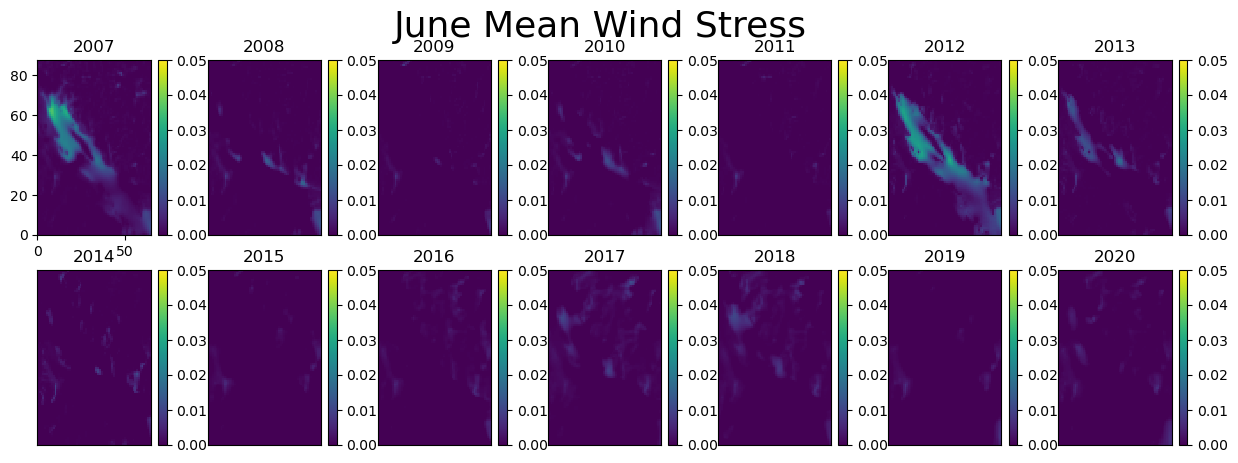

In [35]:
### June winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.05



iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jun_tau2007mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#   iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jun_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jun_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jun_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jun_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jun_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jun_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jun_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jun_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jun_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jun_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jun_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jun_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jun_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)


fig.suptitle('June Mean Wind Stress',fontsize=26)

In [36]:
Jun2007=np.nanmean(jun_tau2007mean)
Jun2008=np.nanmean(jun_tau2008mean)
Jun2009=np.nanmean(jun_tau2009mean)
Jun2010=np.nanmean(jun_tau2010mean)
Jun2011=np.nanmean(jun_tau2011mean)
Jun2012=np.nanmean(jun_tau2012mean)
Jun2013=np.nanmean(jun_tau2013mean)
Jun2014=np.nanmean(jun_tau2014mean)
Jun2015=np.nanmean(jun_tau2015mean)
Jun2016=np.nanmean(jun_tau2016mean)
Jun2017=np.nanmean(jun_tau2017mean)
Jun2018=np.nanmean(jun_tau2018mean)
Jun2019=np.nanmean(jun_tau2019mean)
Jun2020=np.nanmean(jun_tau2020mean)

## July

In [37]:
# extract feb mean wind from one of each type of file:

year=2007
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2007=np.sqrt(fu**2 + fv**2)
jul_C_d2007 = coeff[0] + coeff[1] * jul_wspd2007 + coeff[2] * jul_wspd2007**2
jul_v_along2007 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2007 = rho_a * jul_C_d2007 * jul_v_along2007 * jul_wspd2007
jul_tau2007mean=np.mean(jul_tau_along2007,0)


year=2008
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2008=np.sqrt(fu**2 + fv**2)
jul_C_d2008 = coeff[0] + coeff[1] * jul_wspd2008 + coeff[2] * jul_wspd2008**2
jul_v_along2008 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2008 = rho_a * jul_C_d2008 * jul_v_along2008 * jul_wspd2008
jul_tau2008mean=np.mean(jul_tau_along2008,0)


year=2009
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2009=np.sqrt(fu**2 + fv**2)
jul_C_d2009 = coeff[0] + coeff[1] * jul_wspd2009 + coeff[2] * jul_wspd2009**2
jul_v_along2009 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2009 = rho_a * jul_C_d2009 * jul_v_along2009 * jul_wspd2009
jul_tau2009mean=np.mean(jul_tau_along2009,0)



year=2010
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2010=np.sqrt(fu**2 + fv**2)
jul_C_d2010 = coeff[0] + coeff[1] * jul_wspd2010 + coeff[2] * jul_wspd2010**2
jul_v_along2010 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2010 = rho_a * jul_C_d2010 * jul_v_along2010 * jul_wspd2010
jul_tau2010mean=np.mean(jul_tau_along2010,0)


year=2011
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2011=np.sqrt(fu**2 + fv**2)
jul_C_d2011 = coeff[0] + coeff[1] * jul_wspd2011 + coeff[2] * jul_wspd2011**2
jul_v_along2011 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2011 = rho_a * jul_C_d2011 * jul_v_along2011 * jul_wspd2011
jul_tau2011mean=np.mean(jul_tau_along2011,0)



year=2012
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2012=np.sqrt(fu**2 + fv**2)
jul_C_d2012 = coeff[0] + coeff[1] * jul_wspd2012 + coeff[2] * jul_wspd2012**2
jul_v_along2012 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2012 = rho_a * jul_C_d2012 * jul_v_along2012 * jul_wspd2012
jul_tau2012mean=np.mean(jul_tau_along2012,0)


year=2013
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2013=np.sqrt(fu**2 + fv**2)
jul_C_d2013 = coeff[0] + coeff[1] * jul_wspd2013 + coeff[2] * jul_wspd2013**2
jul_v_along2013 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2013 = rho_a * jul_C_d2013 * jul_v_along2013 * jul_wspd2013
jul_tau2013mean=np.mean(jul_tau_along2013,0)


year=2014
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2014=np.sqrt(fu**2 + fv**2)
jul_C_d2014 = coeff[0] + coeff[1] * jul_wspd2014 + coeff[2] * jul_wspd2014**2
jul_v_along2014 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2014 = rho_a * jul_C_d2014 * jul_v_along2014 * jul_wspd2014
jul_tau2014mean=np.mean(jul_tau_along2014,0)


year=2015
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2015=np.sqrt(fu**2 + fv**2)
jul_C_d2015 = coeff[0] + coeff[1] * jul_wspd2015 + coeff[2] * jul_wspd2015**2
jul_v_along2015 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2015 = rho_a * jul_C_d2015 * jul_v_along2015 * jul_wspd2015
jul_tau2015mean=np.mean(jul_tau_along2015,0)


year=2016
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2016=np.sqrt(fu**2 + fv**2)
jul_C_d2016 = coeff[0] + coeff[1] * jul_wspd2016 + coeff[2] * jul_wspd2016**2
jul_v_along2016 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2016 = rho_a * jul_C_d2016 * jul_v_along2016 * jul_wspd2016
jul_tau2016mean=np.mean(jul_tau_along2016,0)


year=2017
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2017=np.sqrt(fu**2 + fv**2)
jul_C_d2017 = coeff[0] + coeff[1] * jul_wspd2017 + coeff[2] * jul_wspd2017**2
jul_v_along2017 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2017 = rho_a * jul_C_d2017 * jul_v_along2017 * jul_wspd2017
jul_tau2017mean=np.mean(jul_tau_along2017,0)


year=2018
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2018=np.sqrt(fu**2 + fv**2)
jul_C_d2018 = coeff[0] + coeff[1] * jul_wspd2018 + coeff[2] * jul_wspd2018**2
jul_v_along2018 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2018 = rho_a * jul_C_d2018 * jul_v_along2018 * jul_wspd2018
jul_tau2018mean=np.mean(jul_tau_along2018,0)

year=2019
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2019=np.sqrt(fu**2 + fv**2)
jul_C_d2019 = coeff[0] + coeff[1] * jul_wspd2019 + coeff[2] * jul_wspd2019**2
jul_v_along2019 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2019 = rho_a * jul_C_d2019 * jul_v_along2019 * jul_wspd2019
jul_tau2019mean=np.mean(jul_tau_along2019,0)



year=2020
day=dt.datetime(year,7,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,7,1),dt.datetime(year,7,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fu=xr.concat([ii['u_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fv=xr.concat([ii['v_wind'].isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jul_wspd2020=np.sqrt(fu**2 + fv**2)
jul_C_d2020= coeff[0] + coeff[1] * jul_wspd2020+ coeff[2] * jul_wspd2020*2
jul_v_along2020 = fv * np.cos(theta) - fu * np.sin(theta)
jul_tau_along2020 = rho_a * jul_C_d2020 * jul_v_along2020 * jul_wspd2020
jul_tau2020mean=np.mean(jul_tau_along2020,0)

Text(0.5, 0.98, 'July Mean Wind Stress')

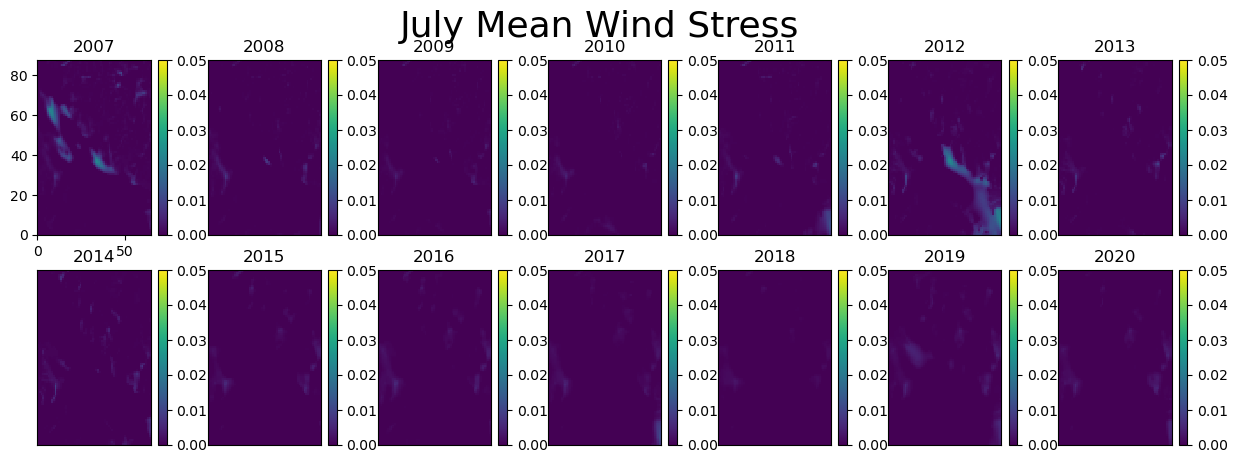

In [38]:
### July winds
fig,ax=plt.subplots(2,7,figsize=(15,5))
vmin=0
vmax=0.05



iax=ax[0,0]
iax.set_title('2007')
m=iax.pcolormesh(jul_tau2007mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#   iax.plot(ii-96,jj-114,'r-')

iax=ax[0,1]
iax.set_title('2008')
m=iax.pcolormesh(jul_tau2008mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)

iax=ax[0,2]
iax.set_title('2009')
m=iax.pcolormesh(jul_tau2009mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)

iax=ax[0,3]
iax.set_title('2010')
m=iax.pcolormesh(jul_tau2010mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
    
iax=ax[0,4]
iax.set_title('2011')
m=iax.pcolormesh(jul_tau2011mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl1lines:
#    iax.plot(ii-96,jj-114,'r-')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
    
iax=ax[0,5]
iax.set_title('2012')
m=iax.pcolormesh(jul_tau2012mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
    
iax=ax[0,6]
iax.set_title('2013')
m=iax.pcolormesh(jul_tau2013mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
    
iax=ax[1,0]
iax.set_title('2014')
m=iax.pcolormesh(jul_tau2014mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in gl2lines:
#    iax.plot(ii-99,jj-117,'r-')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)

iax=ax[1,1]
iax.set_title('2015')
m=iax.pcolormesh(jul_tau2015mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)

iax=ax[1,2]
iax.set_title('2016')
m=iax.pcolormesh(jul_tau2016mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)

iax=ax[1,3]
iax.set_title('2017')
m=iax.pcolormesh(jul_tau2017mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
    
iax=ax[1,4]
iax.set_title('2018')
m=iax.pcolormesh(jul_tau2018mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
    
iax=ax[1,5]
iax.set_title('2019')
m=iax.pcolormesh(jul_tau2019mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax)
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)

    
iax=ax[1,6]
iax.set_title('2020')
m=iax.pcolormesh(jul_tau2020mean,vmin=vmin, vmax=vmax)
fig.colorbar(m,ax=iax,label='')
#for (jj,ii) in opslines:
#    iax.plot(ii-96,jj-119,'r-')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)


fig.suptitle('July Mean Wind Stress',fontsize=26)

In [39]:
Jul2007=np.nanmean(jul_tau2007mean)
Jul2008=np.nanmean(jul_tau2008mean)
Jul2009=np.nanmean(jul_tau2009mean)
Jul2010=np.nanmean(jul_tau2010mean)
Jul2011=np.nanmean(jul_tau2011mean)
Jul2012=np.nanmean(jul_tau2012mean)
Jul2013=np.nanmean(jul_tau2013mean)
Jul2014=np.nanmean(jul_tau2014mean)
Jul2015=np.nanmean(jul_tau2015mean)
Jul2016=np.nanmean(jul_tau2016mean)
Jul2017=np.nanmean(jul_tau2017mean)
Jul2018=np.nanmean(jul_tau2018mean)
Jul2019=np.nanmean(jul_tau2019mean)
Jul2020=np.nanmean(jul_tau2020mean)

In [40]:
Jan_W=(Jan2017+Jan2018+Jan2019+Jan2020)/4
Feb_W=(Feb2017+Feb2018+Feb2019+Jan2020)/4
Mar_W=(Mar2017+Mar2018+Mar2019+Mar2020)/4
Apr_W=(Apr2017+Apr2018+Apr2019+Apr2020)/4
May_W=(May2017+May2018+May2019+May2020)/4
Jun_W=(Jun2017+Jun2018+Jun2019+Jun2020)/4
Jul_W=(Jul2017+Jul2018+Jul2019+Jul2020)/4
#Aug_W=(Aug2017+Aug2018+Aug2019+Aug2020)/4
#Sep_W=(Sep2017+Sep2018+Sep2019+Sep2020)/4
#Oct_W=(Oct2017+Oct2018+Oct2019+Oct2020)/4
#Nov_W=(Nov2017+Nov2018+Nov2019+Nov2020)/4
#Dec_W=(Dec2017+Dec2018+Dec2019+Dec2020)/4

In [41]:
Jan_C=(Jan2008+Jan2010+Jan2011+Jan2012)/4
Feb_C=(Feb2008+Feb2010+Feb2011+Jan2012)/4
Mar_C=(Mar2008+Mar2010+Mar2011+Mar2012)/4
Apr_C=(Apr2008+Apr2010+Apr2011+Apr2012)/4
May_C=(May2008+May2010+May2011+May2012)/4
Jun_C=(Jun2008+Jun2010+Jun2011+Jun2012)/4
Jul_C=(Jul2008+Jul2010+Jul2011+Jul2012)/4
#Aug_C=(Aug2008+Aug2010+Aug2011+Aug2012)/4
#Sep_C=(Sep2008+Sep2010+Sep2011+Sep2012)/4
#Oct_C=(Oct2008+Oct2010+Oct2011+Oct2012)/4
#Nov_C=(Nov2008+Nov2010+Nov2011+Nov2012)/4
#Dec_C=(Dec2008+Dec2010+Dec2011+Dec2012)/4

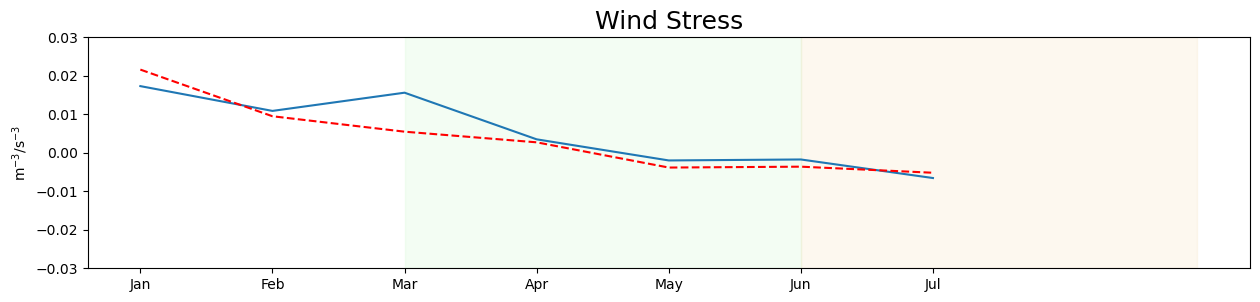

In [42]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

x=['Jan','Feb','Mar','Apr','May','Jun','Jul'] #,'Aug','Sep','Oct','Nov','Dec'
y=[Jan_C,Feb_C,Mar_C,Apr_C,May_C,Jun_C,Jul_C] #,Aug_C,Sep_C,Oct_C,Nov_C,Dec_C
y2=[Jan_W,Feb_W,Mar_W,Apr_W,May_W,Jun_W,Jul_W] #,Aug_W,Sep_W,Oct_W,Nov_W,Dec_W

ax.plot(x, y,label='NPGO+ coldest')
ax.plot(x, y2,label='NPGO- warmest',color='r',linestyle='--')

ax.set_title('Wind Stress',fontsize=18)
ax.legend((),frameon=False)
ax.set_ylim(-0.03,0.03)
ax.set_ylabel('m$^{-3}$/s$^{-3}$')

a=2
b=5
c=5
d=8
plt.fill([a, a, b, b], [-0.03, 0.03, 0.03, -0.03], color = 'lightgreen', alpha = 0.1)
plt.fill([c, c, d, d], [-0.03, 0.03, 0.03, -0.03], color = 'wheat', alpha = 0.2)

In [43]:
### The wind stress is showing even less of a difference than wind speed; go back to Ben Moore-Maley's thesis Chapter 4, Figure 4.11 and try to reproduce results with wind speed

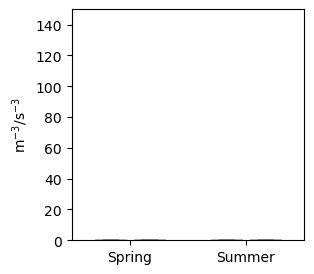

In [45]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=False, positions=pos,widths=0.4)
    for item in ['boxes']:
        plt.setp(bp[item], color=color)
    for item in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color='k')


data1 = [Mar_C,Apr_C,May_C]
data2 = [Mar_W,Apr_W,May_W]
data3 = [Jun_C,Jul_C,Aug_C]
data4 = [Jun_W,Jul_W,Aug_W]

fig, ax = plt.subplots(figsize=(3,3))
bp1 = color_boxplot(data1, 'royalblue', [1])
bp2 = color_boxplot(data2, 'r', [1.5])
bp3 = color_boxplot(data3, 'royalblue', [2.5])
bp4 = color_boxplot(data4, 'r', [3])
#ax.autoscale()
ax.set(xticks=[1.25,2.75], xticklabels=['Spring','Summer'])
ax.set_ylim(0,150)
ax.set_ylabel('m$^{-3}$/s$^{-3}$')
#ax.legend([bp1["boxes"], bp2["boxes"], ['A', 'B'], loc='upper right')
plt.show()